In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import random




In [39]:
df=pd.read_csv("breast-cancer.csv")

In [40]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
df.shape

(569, 32)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

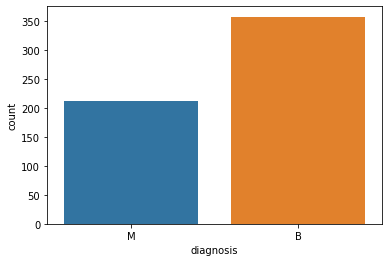

In [44]:
sns.countplot(x=df['diagnosis'])

In [45]:
corr = df.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [46]:
df1=df.drop(columns='id')
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
df2=df1.drop(columns='diagnosis')
df2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
cor1=df1.corr()
cor1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [49]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df1.iloc[:,0]=labelencoder_Y.fit_transform(df1.iloc[:,0].values)
df1.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [50]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


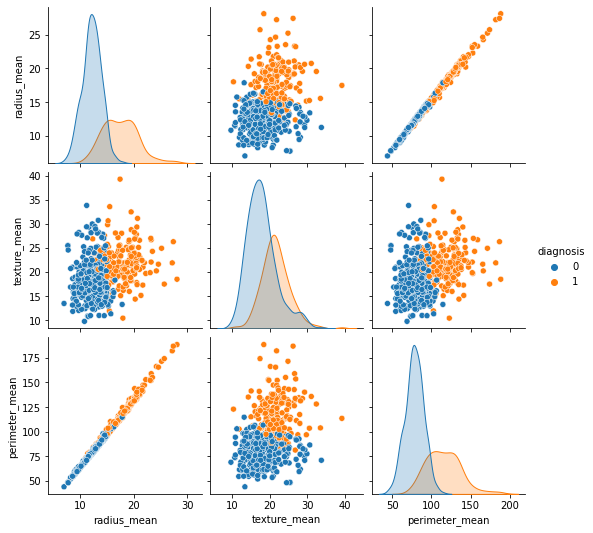

In [51]:
#creating pairplot
sns.pairplot(df1.iloc[:,0:4], hue='diagnosis')

<Axes: >

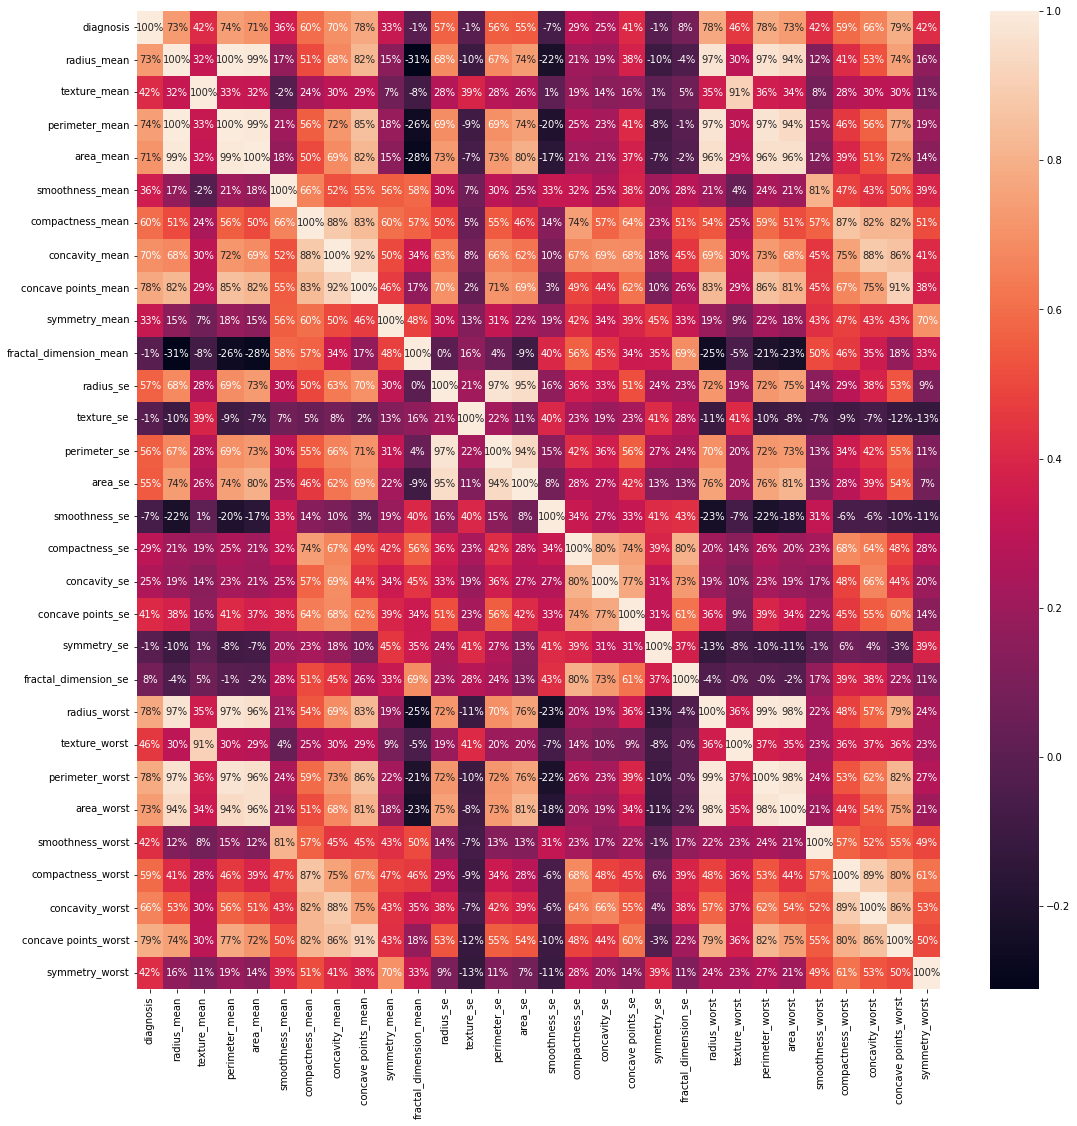

In [52]:
#visualize the correlation
plt.figure(figsize=(18,18))
sns.heatmap(df1.iloc[:,0:30].corr(), annot=True, fmt='.0%')

<Axes: >

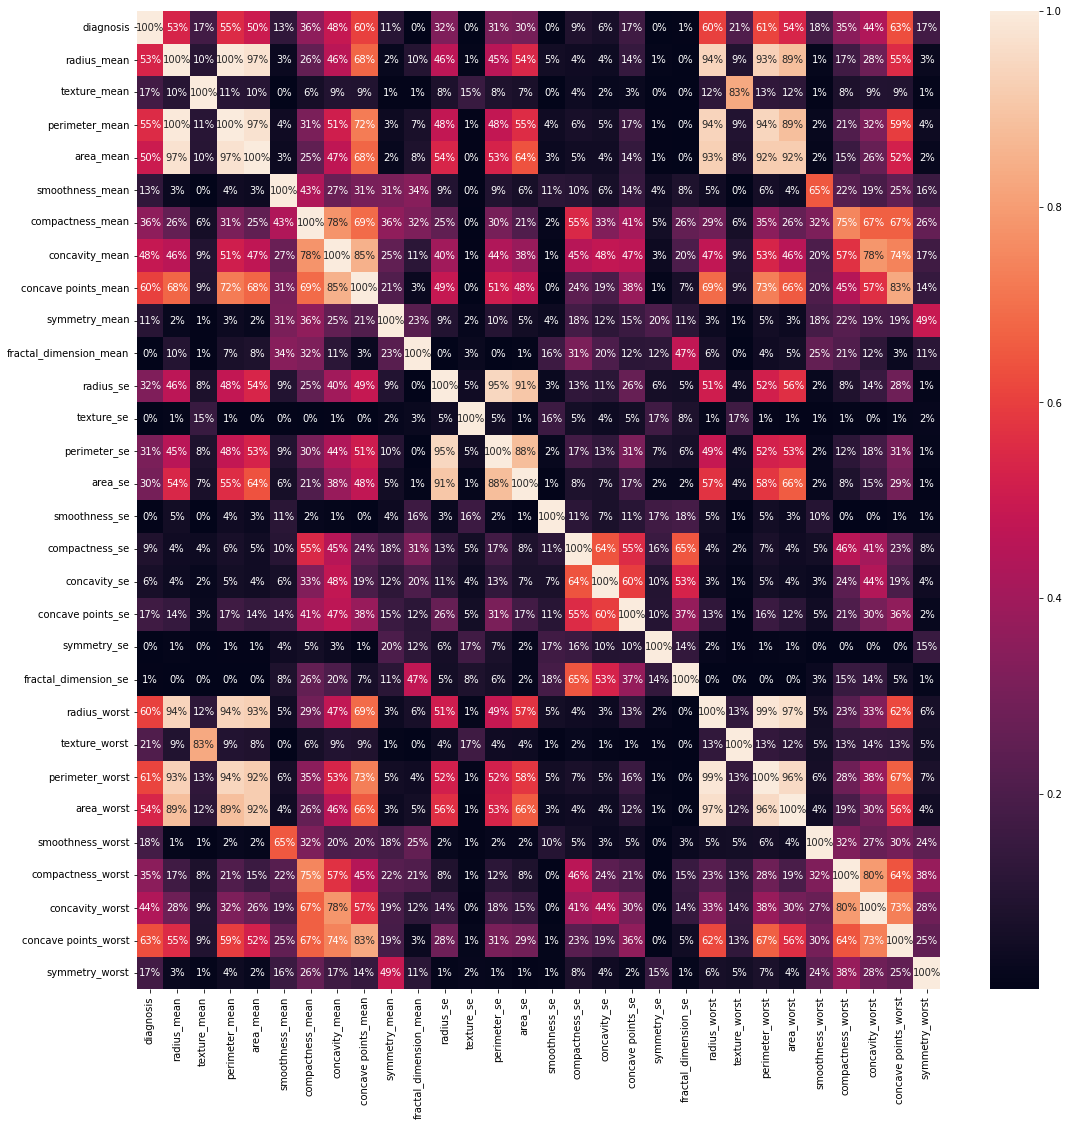

In [53]:
#visualize the coefficient of determination
plt.figure(figsize=(18,18))
sns.heatmap(df1.iloc[:,0:30].corr()**2, annot=True, fmt='.0%')

In [54]:
D='diagnosis'
R=df1.corr()[D]
r=R**2

<Axes: >

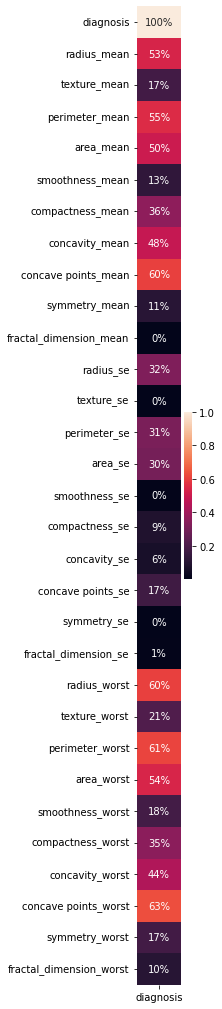

In [55]:
plt.figure(figsize=(1,18))
sns.heatmap(r.to_frame(), annot=True, fmt='.0%')

In [56]:
#dropping the coloumns #threshold=30%
columns_less_than_30=r[r<0.3].index
df2 = df1.drop(columns=columns_less_than_30)
df2

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,25.380,184.60,2019.0,0.66560,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,24.990,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,23.570,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,14.910,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,22.540,152.20,1575.0,0.20500,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,25.450,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,23.690,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,18.980,126.70,1124.0,0.30940,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,25.740,184.60,1821.0,0.86810,0.9387,0.2650


<Axes: >

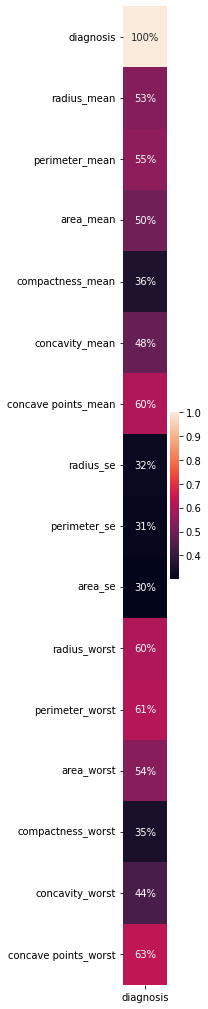

In [57]:
D2='diagnosis'
R2=df2.corr()[D]
r2=R2**2

plt.figure(figsize=(1,18))
sns.heatmap(r2.to_frame(), annot=True, fmt='.0%')

In [58]:
# Assuming X and y are your independent and dependent variables respectively
X = df2.iloc[:, 1:15].values  # Independent variables
np.set_printoptions(suppress=True)
Y = df2.iloc[:, 0].values  # Dependent variable

In [59]:
random.seed(42)
np.random.seed(42)
# spliting the data into training and test dateset
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)



In [60]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [61]:
import numpy as np

class Logistic_Regression():

    # declaring learning rate & number of iterations (Hyperparameters)
    def __init__(self, learning_rate, no_of_iterations,random_state=42):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.random_state=42

    # fit function to train the model with dataset
    def fit(self, X, Y):
        # number of data points in the dataset (number of rows)  -->  m
        # number of input features in the dataset (number of columns)  --> n
        self.m, self.n = X.shape
        np.random.seed(self.random_state)
        # initiating weight & bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        # Y_hat formula (sigmoid function)
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))

        # derivatives
        dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y))
        db = (1 / self.m) * np.sum(Y_hat - self.Y)

        # updating the weights & bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    # Sigmoid Equation & Decision Boundary
    def predict(self, X):
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred
    
    #evaluate the performance of a model on a dataset
    def score(self, X, Y):
        Y_pred = self.predict(X)
        accuracy = np.mean(Y_pred == Y)
        return accuracy
    
   
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'no_of_iterations': self.no_of_iterations
        }


In [62]:


class SVM_classifier():
    def __init__(self, learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01,random_state=42):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        self.w = None
        self.b = None
        self.random_state=42
        

    def fit(self, X, Y):
        np.random.seed(self.random_state)
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        y_label = np.where(self.Y <= 0, -1, 1)
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index]) * x_i
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat

    def score(self, X, Y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == Y)
        return accuracy

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'no_of_iterations': self.no_of_iterations,
            'lambda_parameter': self.lambda_parameter
        }


In [63]:
# models/ Algorithms

def models(X_train,Y_train):
        
        #logistic regression
        log=Logistic_Regression(learning_rate=0.001, no_of_iterations=1000, random_state=42)
        log.fit(X_train,Y_train)
        
        #svm
        sv_m=SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01,random_state=42)
        sv_m.fit(X_train,Y_train)
        
        
        print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
        print('[1]Support vector machine accuracy:',sv_m.score(X_train,Y_train))
        
        return log,sv_m
    
   

In [64]:
model = models(X_train, Y_train)


[0]logistic regression accuracy: 0.9230769230769231
[1]Support vector machine accuracy: 0.9208791208791208


In [65]:
#0.9230769230769231....0.9208791208791208

In [66]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [67]:
get_score(Logistic_Regression(learning_rate=0.001, no_of_iterations=1000,random_state=42),X_train,X_test,Y_train,Y_test)

0.956140350877193

In [68]:
get_score(SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01),X_train,X_test,Y_train,Y_test)

0.9473684210526315

In [69]:
#0.956140350877193....0.9473684210526315

In [70]:
# Create an instance of LogisticRegressionClassifier with the desired parameters
logistic_model = Logistic_Regression(learning_rate=0.001, no_of_iterations=1000,random_state=42)

# Perform cross-validation using cross_val_score
scores = cross_val_score(logistic_model, X_train, Y_train, cv=5)
scores

array([0.91208791, 0.91208791, 0.92307692, 0.93406593, 0.94505495])

In [ ]:
svm_model=SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
scores1=cross_val_score(svm_model, X_train,Y_train,cv=5)
scores1

In [ ]:
#0.956140350877193.....0.9473684210526315

In [ ]:
# testing the models/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(Y_test,model[i].predict(X_test)))

In [ ]:

# prediction of logistic
pred=model[0].predict(X_test)
print('Predicted values by Logistic Regression:')
print(pred)


# prediction of SVM

pred=model[1].predict(X_test)
print('Predicted values by SVM:')
print(pred)


print('Actual values from DATASET:')
print(Y_test)

